In [2]:
import sys
sys.path.insert(0, '../../src')
from utils import preprocession as prep
from utils.metrics import compute_metric
from utils import visualization as vis
from models.SVM import train_SVM_models, train_LR_models, predict_from_models

import pickle
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import decomposition as mf

from tqdm.notebook import tqdm

## Load Data

In [14]:
save_figures = True
folder_name = 'Smartvote'
data_name = 'Original'

train, test = prep.load_data(folder_name, data_name)
train_users, train_reactions = train
test_users, test_reactions = test
p = 0

method_path = f"../../embeddings/TSNE/{folder_name}/{data_name}"

with open(f'{method_path}/TSNE_{p}.pkl', 'rb') as file:
    tsne = pickle.load(file)


embedding = pd.read_csv(f'{method_path}/train_embedding_{p}.csv', index_col=0)
embedding = embedding.loc[:,['y','x']]

## Visualize

In [15]:
LR_models = train_LR_models(embedding.values, train_reactions[p])

def LR_predict(params, answers):
    predictions = []
    for q in answers:
        predictions.append(LR_models[q].predict_proba(params)[:, 1])
    return np.array(predictions)


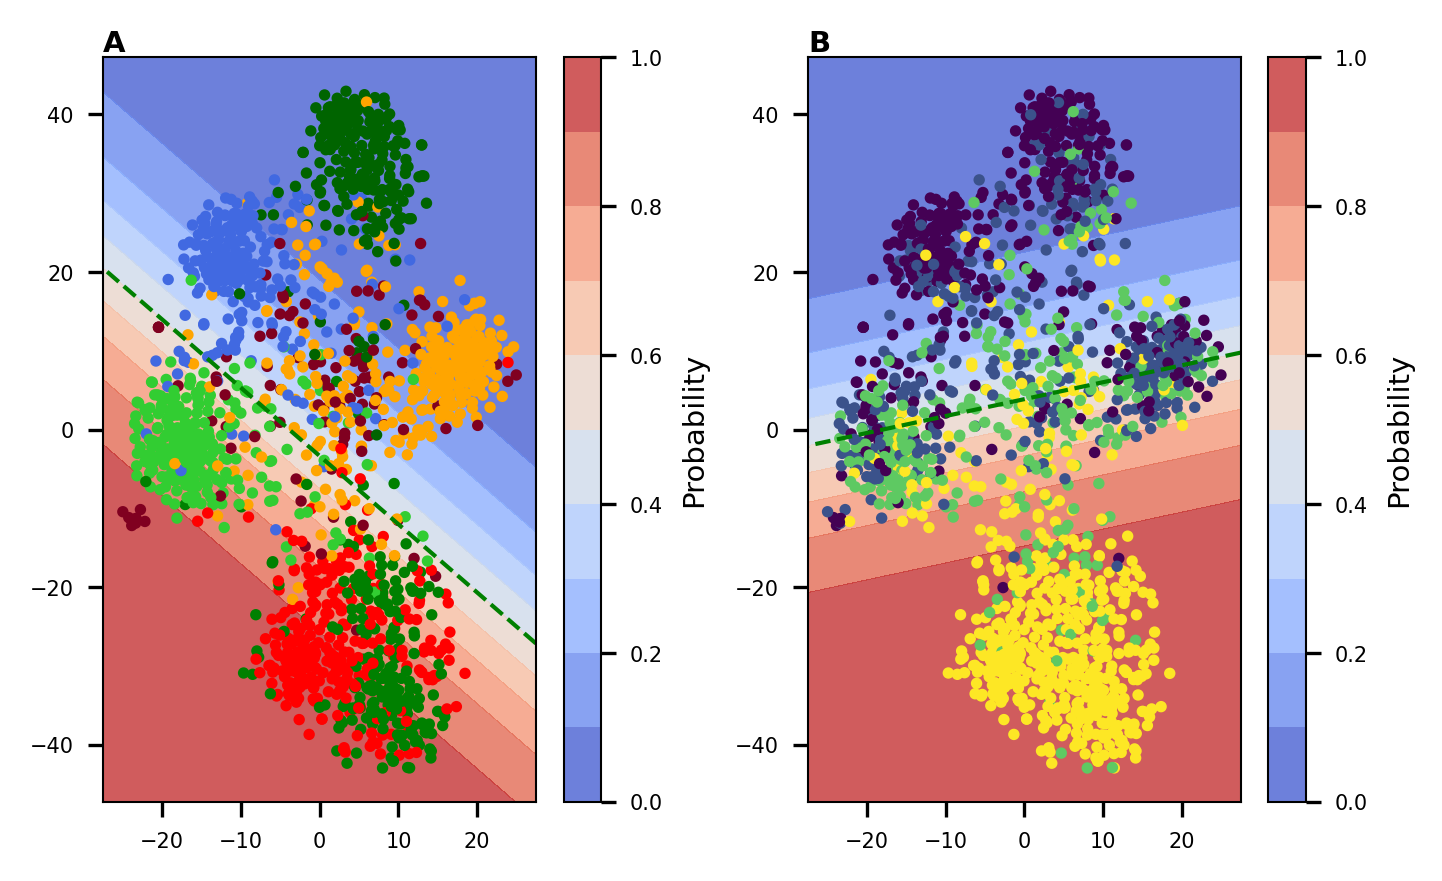

In [22]:
q1,q2 = '55','12'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(vis.textwidth, .6*vis.textwidth))

ax1 = vis.plotEmbedding(embedding, c=train_users.loc[:,'color'],s=3, ax=ax1)
vis.plotFeature(LR_predict, q1, ax=ax1)

ax2 = vis.plotEmbedding(embedding,s=3, c=train_reactions[p].loc[:,q2], ax=ax2)
vis.plotFeature(LR_predict, q2, ax=ax2)

if save_figures:
    fig.text(-0,1, 'A', va='bottom', ha='left', weight='bold', transform=ax1.transAxes)
    fig.text(-0,1, 'B', va='bottom', ha='left', weight='bold', transform=ax2.transAxes)
    fig.tight_layout()
    vis.savefig(fig, save_figures, 'ecml-paper', folder_name, data_name, name=f'TSNE_LR_Q{q1}_Q{q2}')
else:
    ax1.set_title(f'VAE with {p}% Missing Values (Question {q})')
    ax2.set_title(f'VAE with {p}% Missing Values (Question {q})')

In [39]:
params = np.arange(12).reshape(6,2)
LR_predict(params, ['64']).shape

(1, 6)